   b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18              

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


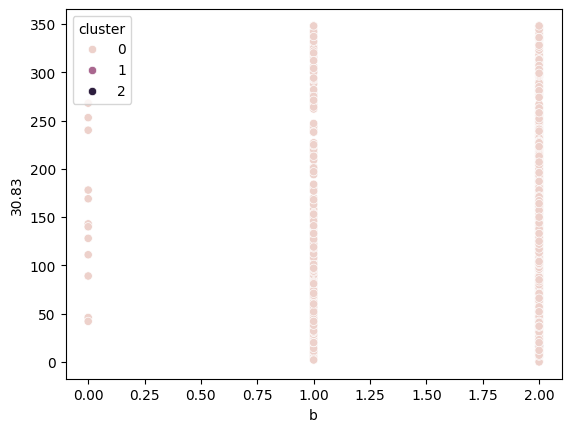

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Thăm dò dữ liệu
print(crx_data.head())
print(country_data.head())

# Tiền xử lý dữ liệu
crx_data_encoded = crx_data.copy()
for column in crx_data_encoded.columns:
    if crx_data_encoded[column].dtype == type(object):
        le = LabelEncoder()
        crx_data_encoded[column] = le.fit_transform(crx_data_encoded[column])

# Phân cụm dữ liệu
kmeans = KMeans(n_clusters=3)
crx_data_encoded['cluster'] = kmeans.fit_predict(crx_data_encoded)

# Đánh giá chất lượng phân cụm
print('Silhouette Score for crx_data:', silhouette_score(crx_data_encoded, crx_data_encoded['cluster']))

# Trực quan hóa kết quả phân cụm
sns.scatterplot(data=crx_data_encoded, x=crx_data_encoded.columns[0], y=crx_data_encoded.columns[1], hue='cluster')
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Phân cụm dữ liệu
agg_clustering = AgglomerativeClustering(n_clusters=3)
crx_data['cluster'] = agg_clustering.fit_predict(crx_data)

# Lặp lại quy trình cho country_data
for column in country_data.columns:
    if country_data[column].dtype == type(object):
        country_data[column] = le.fit_transform(country_data[column])

# Xử lý giá trị thiếu
country_data = country_data.replace([np.inf, -np.inf], np.nan)
country_data = country_data.fillna(country_data.mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
country_data_scaled = pd.DataFrame(scaler.fit_transform(country_data), columns=country_data.columns)

# Phân cụm dữ liệu
country_data_scaled['cluster'] = agg_clustering.fit_predict(country_data_scaled)

# In ra kết quả
print(crx_data.head())
print(country_data_scaled.head())

   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
   Country/Region  Confirmed    Deaths  Recovered    Active  New cases  \
0       -1.722813  -0.135676 -0.158475  -0.134087 -0.113774  -0.196126   
1       -1.704288  -0.217768 -0.238477  -0.252461 -0.150459  -0.194195   
2       -1.685763  -0.157361 -0.166013  -0.167623 -0.122342  -0.106576   
3       -1.667239  -0.228160 -0.245019  -0.262699 -0.159573  -0.212983   
4       -1.648714  -0.228048 -0.245801  -0.265657 -0.156682  -0.211578   

   New deaths  New r

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Phân cụm dữ liệu
kmeans = KMeans(n_clusters=3)
crx_data['cluster'] = kmeans.fit_predict(crx_data)

# Lặp lại quy trình cho country_data
for column in country_data.columns:
    if country_data[column].dtype == type(object):
        country_data[column] = le.fit_transform(country_data[column])

# Xử lý giá trị thiếu
country_data = country_data.replace([np.inf, -np.inf], np.nan)
country_data = country_data.fillna(country_data.mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
country_data_scaled = pd.DataFrame(scaler.fit_transform(country_data), columns=country_data.columns)

# Phân cụm dữ liệu
country_data_scaled['cluster'] = kmeans.fit_predict(country_data_scaled)

# In ra kết quả
print(crx_data.head())
print(country_data_scaled.head())

   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
   Country/Region  Confirmed    Deaths  Recovered    Active  New cases  \
0       -1.722813  -0.135676 -0.158475  -0.134087 -0.113774  -0.196126   
1       -1.704288  -0.217768 -0.238477  -0.252461 -0.150459  -0.194195   
2       -1.685763  -0.157361 -0.166013  -0.167623 -0.122342  -0.106576   
3       -1.667239  -0.228160 -0.245019  -0.262699 -0.159573  -0.212983   
4       -1.648714  -0.228048 -0.245801  -0.265657 -0.156682  -0.211578   

   New deaths  New r

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
import skfuzzy as fuzz
from sklearn import metrics

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    crx_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)

# Lưu trữ cụm Fuzzy C-means
crx_data['cluster'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
crx_data['cluster_dbscan'] = dbscan.fit_predict(crx_data_scaled)

# In ra kết quả
print(crx_data.head())

   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster  cluster_dbscan  
0        0              -1  
1        0              -1  
2        0              -1  
3        0              -1  
4        0              -1  


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])
        

# Xử lý giá trị thiếu
country_data = country_data.replace([np.inf, -np.inf], np.nan)
country_data = country_data.fillna(country_data.mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
crx_data['cluster_kmeans'] = kmeans.fit_predict(crx_data_scaled)

# Phân cụm dữ liệu bằng AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
crx_data['cluster_agg'] = agg_clustering.fit_predict(crx_data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    crx_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
crx_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
crx_data['cluster_dbscan'] = dbscan.fit_predict(crx_data_scaled)

# In ra kết quả
print(crx_data.head())

   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster_kmeans  cluster_agg  cluster_fuzzy_cmeans  cluster_dbscan  
0               0            1                     0              -1  
1               1            0                     0              -1  
2               0            1                     0              -1  
3               1            0                     0              -1  
4               0            0                     0              -1  


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

for column in country_data.columns:
    if country_data[column].dtype == type(object):
        country_data[column] = le.fit_transform(country_data[column])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)
country_data_scaled = pd.DataFrame(scaler.fit_transform(country_data), columns=country_data.columns)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
crx_data['cluster_agg'] = agg_clustering.fit_predict(crx_data_scaled)
country_data['cluster_agg'] = agg_clustering.fit_predict(country_data_scaled)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
crx_data['cluster_kmeans'] = kmeans.fit_predict(crx_data_scaled)
country_data['cluster_kmeans'] = kmeans.fit_predict(country_data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(crx_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
crx_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(country_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
country_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
crx_data['cluster_dbscan'] = dbscan.fit_predict(crx_data_scaled)
country_data['cluster_dbscan'] = dbscan.fit_predict(country_data_scaled)

# In ra kết quả
print(crx_data.head())
print(country_data.head())

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')
country_data = pd.read_csv('country_wise_latest.csv')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

for column in country_data.columns:
    if country_data[column].dtype == type(object):
        country_data[column] = le.fit_transform(country_data[column])

# Xử lý giá trị vô cùng
country_data.replace([np.inf, -np.inf], np.nan, inplace=True)
country_data.fillna(country_data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)
country_data_scaled = pd.DataFrame(scaler.fit_transform(country_data), columns=country_data.columns)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
crx_data['cluster_agg'] = agg_clustering.fit_predict(crx_data_scaled)
country_data['cluster_agg'] = agg_clustering.fit_predict(country_data_scaled)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
crx_data['cluster_kmeans'] = kmeans.fit_predict(crx_data_scaled)
country_data['cluster_kmeans'] = kmeans.fit_predict(country_data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(crx_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
crx_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(country_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
country_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
crx_data['cluster_dbscan'] = dbscan.fit_predict(crx_data_scaled)
country_data['cluster_dbscan'] = dbscan.fit_predict(country_data_scaled)

# In ra kết quả
print(crx_data.head())
print('-----------------------------------------------------------------------')
print(country_data.head())

   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster_agg  cluster_kmeans  cluster_fuzzy_cmeans  cluster_dbscan  
0            1               0                     1              -1  
1            0               1                     1              -1  
2            1               0                     1              -1  
3            0               1                     1              -1  
4            0               0                     1              -1  
-----------------------------------------------------------------------
   Country/Region  Confirmed  Deaths  Recover

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

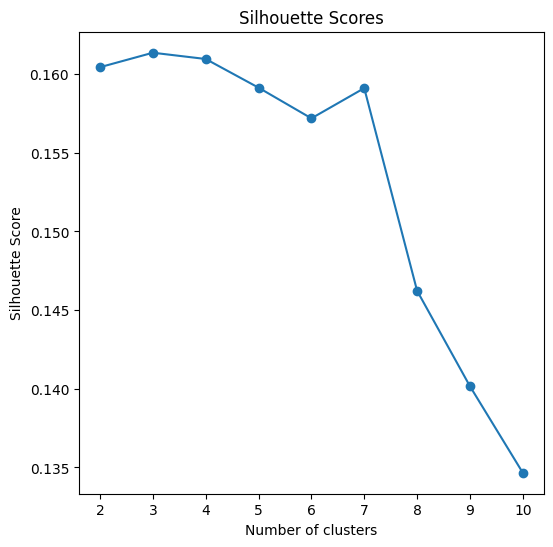

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

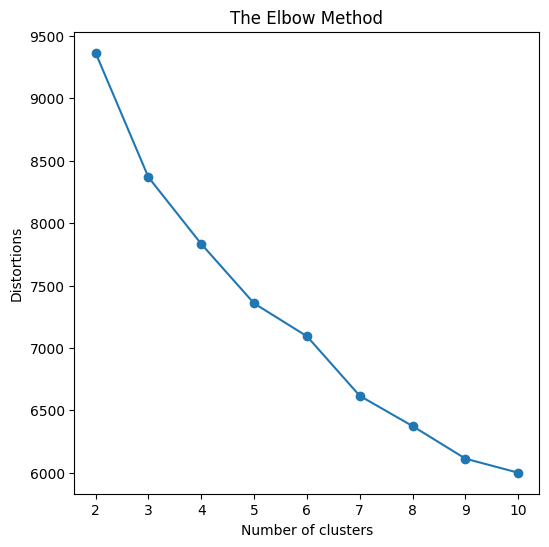

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tính Silhouette Score cho KMeans
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(crx_data_scaled)
    silhouette_avg = silhouette_score(crx_data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Vẽ đồ thị Silhouette Score
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Tính tổng bình phương khoảng cách cho một loạt các giá trị k
distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(crx_data_scaled)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [20]:
from sklearn.metrics import adjusted_rand_score

# assuming true_labels and crx_data are defined properly
methods = ['cluster_agg', 'cluster_kmeans', 'cluster_fuzzy_cmeans', 'cluster_dbscan']
for method in methods:
    score = adjusted_rand_score(true_labels, crx_data[method])
    print(f'Adjusted Rand Index for {method}: {score}')

InvalidParameterError: The 'labels_true' parameter of adjusted_rand_score must be an array-like. Got Ellipsis instead.